Análise de Dados




In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("./user_behavior_dataset.csv")

# Análise primaria do dataset
display(df)
print("-----------------------------\nData types:\n", df.dtypes)
print("-----------------------------\nDescribe:\n",df.describe())
print("-----------------------------\nVerificando se há valores NaN:\n",df.isna().sum())
print("-----------------------------\nVerificando se há valores nulos:\n",df.isnull().sum())

std_deviation = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 
                      'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']].std()

print("-----------------------------\nDesvio Padrao:\n",std_deviation)
print("-----------------------------\nIdades Unicas:\n", df['Age'].unique())

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


-----------------------------
Data types:
 User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object
-----------------------------
Describe:
          User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.5000

Análise Exploratória


In [65]:

print("-----------------------------\nIntervalo de idades:\n", df["Age"].min(), "a", df["Age"].max())
print("-----------------------------\nMédia das idades:\n",round(df["Age"].mean(), 2))
print("-----------------------------\nMediana das idades:\n",round(df["Age"].median(), 2))
print("-----------------------------\nModa das idades:\n",round(df["Age"].mode(), 2))
print("-----------------------------\nMédia dos apps instalados:\n",round(df["Number of Apps Installed"].mean(), 2))
print("-----------------------------\nMédia de Tempo de Tela Ligada (horas/dia):\n", round(df["Screen On Time (hours/day)"].mean(), 2))
print("-----------------------------\nMédia do uso de dados (MB/Dia):\n", round(df["Data Usage (MB/day)"].mean(), 2))

-----------------------------
Intervalo de idades:
 18 a 59
-----------------------------
Média das idades:
 38.48
-----------------------------
Mediana das idades:
 38.0
-----------------------------
Moda das idades:
 0    34
1    51
Name: Age, dtype: int64
-----------------------------
Média dos apps instalados:
 50.68
-----------------------------
Média de Tempo de Tela Ligada (horas/dia):
 5.27
-----------------------------
Média do uso de dados (MB/Dia):
 929.74


Análise Visual


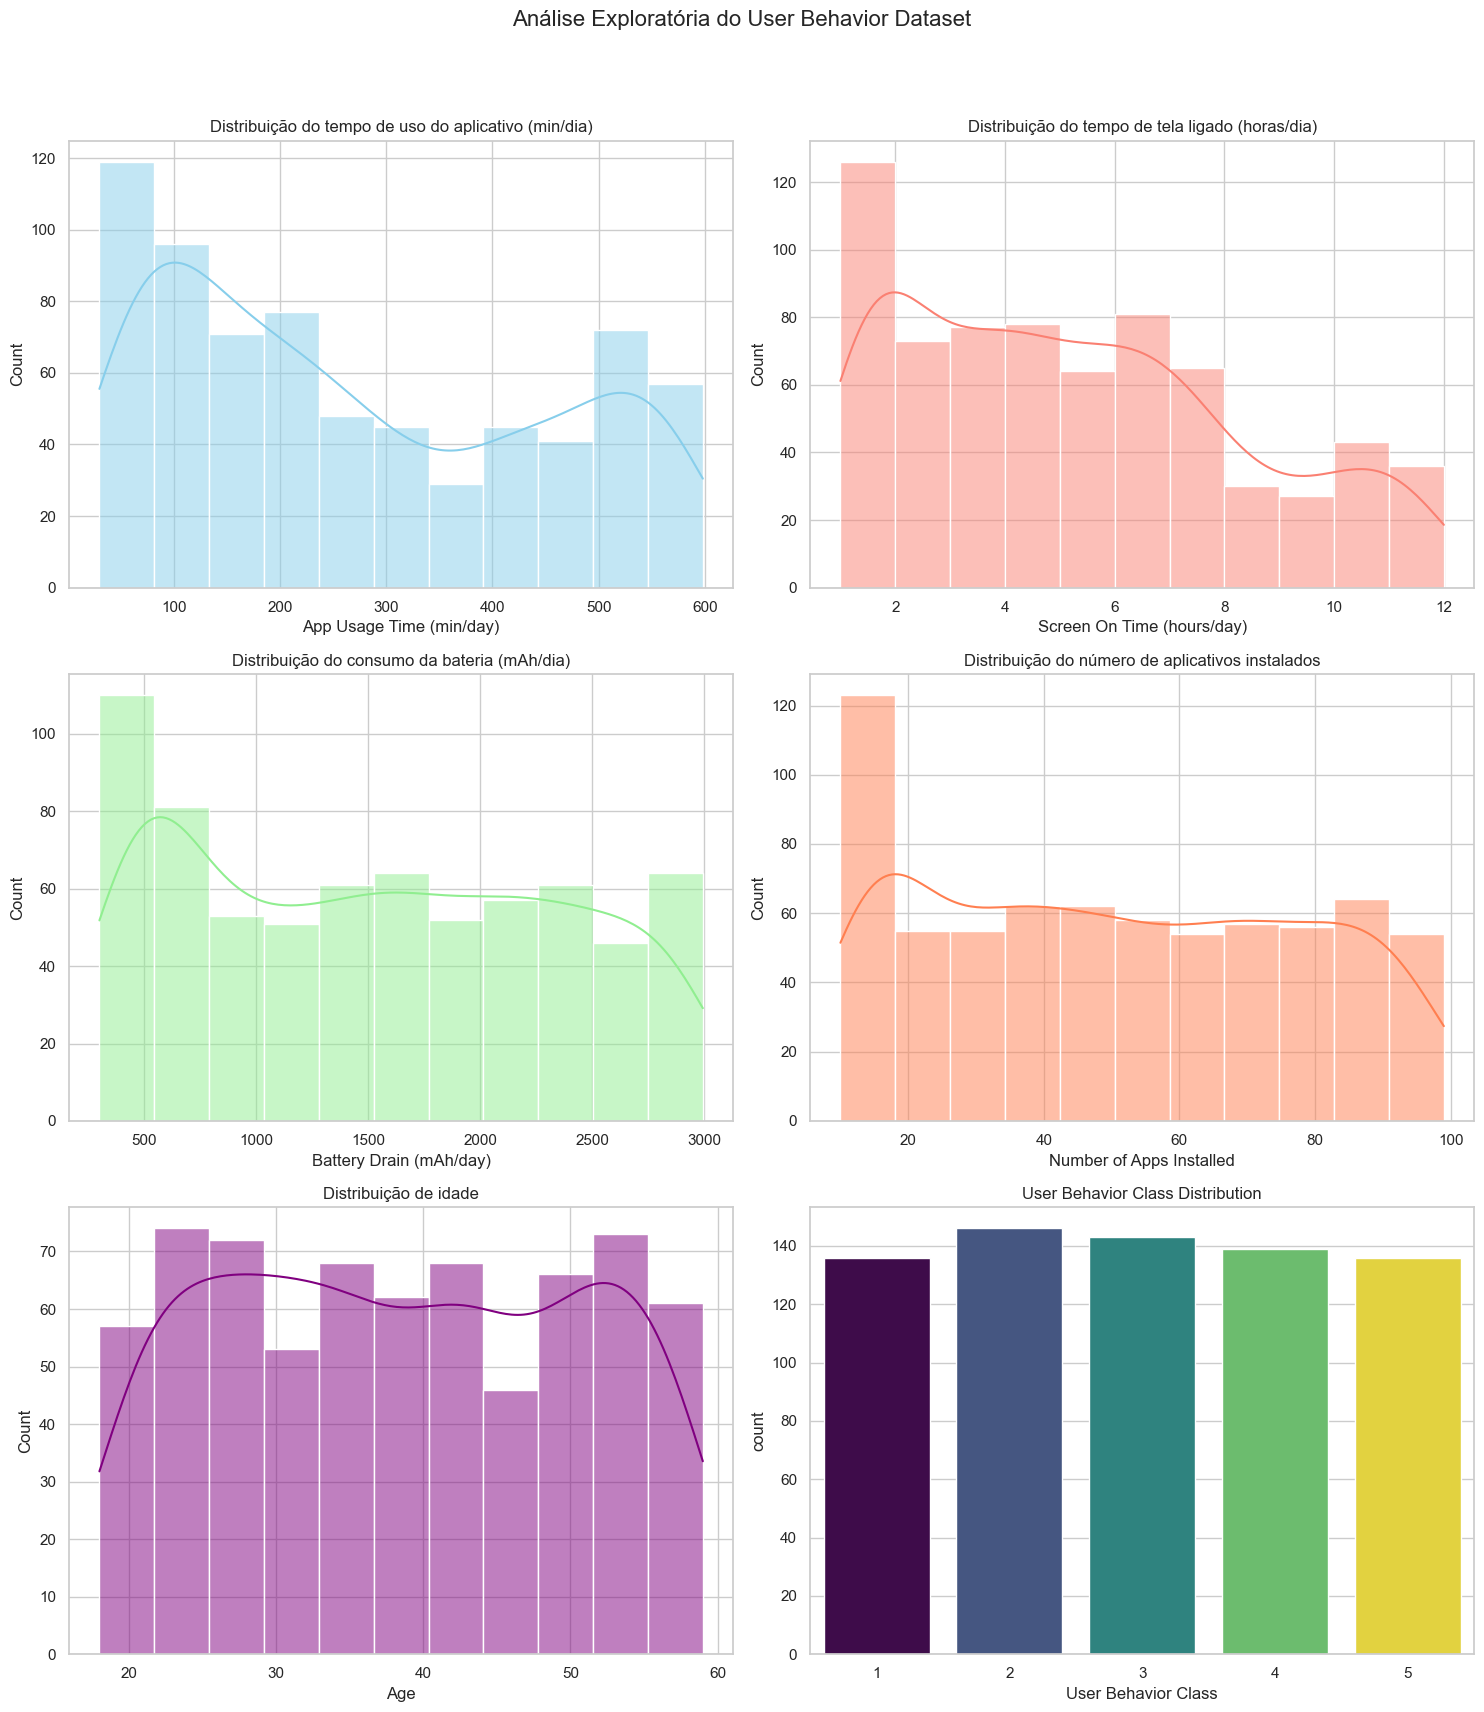

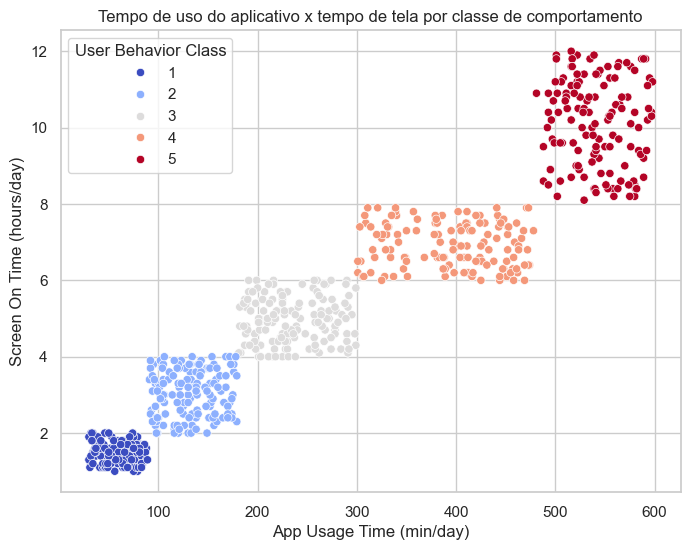

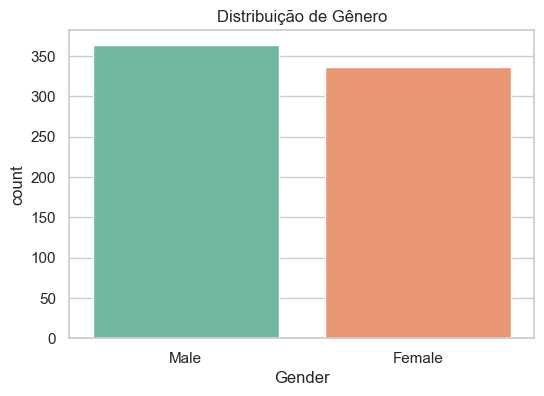

In [66]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle("Análise Exploratória do User Behavior Dataset", fontsize=16)
sns.histplot(df['App Usage Time (min/day)'], kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title("Distribuição do tempo de uso do aplicativo (min/dia)")
sns.histplot(df['Screen On Time (hours/day)'], kde=True, color="salmon", ax=axes[0, 1])
axes[0, 1].set_title("Distribuição do tempo de tela ligado (horas/dia)")
sns.histplot(df['Battery Drain (mAh/day)'], kde=True, color="lightgreen", ax=axes[1, 0])
axes[1, 0].set_title("Distribuição do consumo da bateria (mAh/dia)")
sns.histplot(df['Number of Apps Installed'], kde=True, color="coral", ax=axes[1, 1])
axes[1, 1].set_title("Distribuição do número de aplicativos instalados")
sns.histplot(df['Age'], kde=True, color="purple", ax=axes[2, 0])
axes[2, 0].set_title("Distribuição de idade")
sns.countplot(x='User Behavior Class', hue='User Behavior Class', data=df, palette="viridis", ax=axes[2, 1], legend=False)
axes[2, 1].set_title("User Behavior Class Distribution")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='App Usage Time (min/day)', y='Screen On Time (hours/day)', hue='User Behavior Class', palette='coolwarm')
plt.title('Tempo de uso do aplicativo x tempo de tela por classe de comportamento')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Distribuição de Gênero')
plt.show()


Preparando dados para Treinamento


In [67]:
# Preparando o dataset para treinamento
df_prepared = df.drop(columns='User ID')

le = LabelEncoder()
df_prepared['Gender'] = le.fit_transform(df_prepared['Gender'])
df_prepared['Operating System'] = le.fit_transform(df_prepared['Operating System'])
df_prepared['Device Model'] = le.fit_transform(df_prepared['Device Model'])

df_prepared.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3


KNeighbors

In [68]:

X = df_prepared.drop(columns=['User Behavior Class'])
y = df_prepared['User Behavior Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

# Predizer no conjunto de teste
y_pred_knn = knn.predict(X_test)

# Relatório de classificação
print("K-Nearest Neighbors")
print("Acertou %d de %d" % ((y_test == y_pred_knn).sum(), len(X_test)))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
Acertou 210 de 210
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



Random Forest Tree

Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



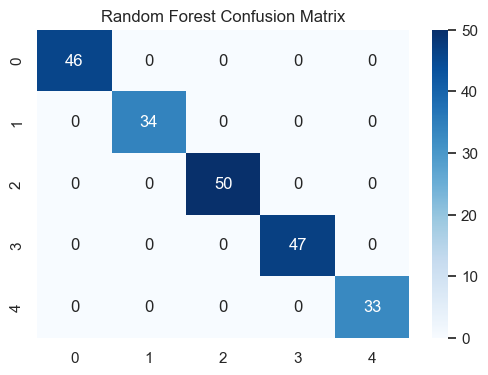

In [69]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [70]:
print(classification_report(y_test, y_pred_knn))
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

